# Temperature Forecast Project using ML
Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
url=('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df=pd.read_csv(url)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Checking all th features in the dataset.

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Will rename some columns for better understanding

In [8]:
df.rename(columns={'LDAPS_RHmin': 'RHmin', 'LDAPS_RHmax': 'RHmax','LDAPS_Tmax_lapse':'Tmax_lapse',
                  'LDAPS_Tmin_lapse':'Tmin_lapse','LDAPS_WS':'WS','LDAPS_LH':'LH',
                  'LDAPS_CC1':'CC1','LDAPS_CC2':'CC2','LDAPS_CC3':'CC3','LDAPS_CC4':'CC4',
                    'LDAPS_PPT1':'PPT1','LDAPS_PPT2':'PPT2','LDAPS_PPT3':'PPT3','LDAPS_PPT4':'PPT4','Solar radiation':'SoLR'}, inplace=True)

In [9]:
df

,station,Date,Present_Tmax,Present_Tmin,RHmin,RHmax,Tmax_lapse,Tmin_lapse,WS,LH,CC1,CC2,CC3,CC4,PPT1,PPT2,PPT3,PPT4,lat,lon,DEM,Slope,SoLR,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station       7750 non-null   float64
 1   Date          7750 non-null   object 
 2   Present_Tmax  7682 non-null   float64
 3   Present_Tmin  7682 non-null   float64
 4   RHmin         7677 non-null   float64
 5   RHmax         7677 non-null   float64
 6   Tmax_lapse    7677 non-null   float64
 7   Tmin_lapse    7677 non-null   float64
 8   WS            7677 non-null   float64
 9   LH            7677 non-null   float64
 10  CC1           7677 non-null   float64
 11  CC2           7677 non-null   float64
 12  CC3           7677 non-null   float64
 13  CC4           7677 non-null   float64
 14  PPT1          7677 non-null   float64
 15  PPT2          7677 non-null   float64
 16  PPT3          7677 non-null   float64
 17  PPT4          7677 non-null   float64
 18  lat           7752 non-null 

We have all numerical data except date which is categorical.

In [11]:
df.isnull().sum()

station          2
Date             2
Present_Tmax    70
Present_Tmin    70
RHmin           75
RHmax           75
Tmax_lapse      75
Tmin_lapse      75
WS              75
LH              75
CC1             75
CC2             75
CC3             75
CC4             75
PPT1            75
PPT2            75
PPT3            75
PPT4            75
lat              0
lon              0
DEM              0
Slope            0
SoLR             0
Next_Tmax       27
Next_Tmin       27
dtype: int64

There are quite a few null values present in our dataset. Lets explore them

In [12]:
df.station.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [13]:
df[df['station'].isnull()]

,station,Date,Present_Tmax,Present_Tmin,RHmin,RHmax,Tmax_lapse,Tmin_lapse,WS,LH,CC1,CC2,CC3,CC4,PPT1,PPT2,PPT3,PPT4,lat,lon,DEM,Slope,SoLR,Next_Tmax,Next_Tmin
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,NaN,NaN,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.97471,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


Since station and date are in sequence. I will follow the same sequence and update the null values

In [14]:
df.fillna({'Date': '31-08-2017'}, inplace=True)

In [15]:
df[df['station'].isnull()]

,station,Date,Present_Tmax,Present_Tmin,RHmin,RHmax,Tmax_lapse,Tmin_lapse,WS,LH,CC1,CC2,CC3,CC4,PPT1,PPT2,PPT3,PPT4,lat,lon,DEM,Slope,SoLR,Next_Tmax,Next_Tmin
7750,NaN,31-08-2017,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.370,0.098475,4329.520508,17.4,11.3
7751,NaN,31-08-2017,37.6,29.9,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.97471,23.701544,21.621661,15.841235,16.655469,37.6450,127.135,212.335,5.178230,5992.895996,38.9,29.8


In [16]:
df.fillna({'station': 1.0}, inplace=True)

In [17]:
df

,station,Date,Present_Tmax,Present_Tmin,RHmin,RHmax,Tmax_lapse,Tmin_lapse,WS,LH,CC1,CC2,CC3,CC4,PPT1,PPT2,PPT3,PPT4,lat,lon,DEM,Slope,SoLR,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,1.0,31-08-2017,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Lets check the statistical summary to understand whether we have to fill the NaN values with mean or median

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
station,7752.0,12.996904,7.213213,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


Most of the data is close to normally distributed except PPT 1 to PPT4, hence we use the mean to update the null values

We will use the for loop to fill the Null values but before that we will extract Day and Month from the Date column.

In [19]:
df['Date']=pd.to_datetime(df['Date'])

In [20]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [21]:
df['Day'] = df['Date'].dt.day

In [22]:
df.drop(['Date'],axis=1,inplace=True)

In [23]:
df

,station,Present_Tmax,Present_Tmin,RHmin,RHmax,Tmax_lapse,Tmin_lapse,WS,LH,CC1,CC2,CC3,CC4,PPT1,PPT2,PPT3,PPT4,lat,lon,DEM,Slope,SoLR,Next_Tmax,Next_Tmin,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,6,30
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,6,30
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,6,30
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,6,30
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,8,30
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,8,30
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,8,30
7750,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,8,31


In [24]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].mean())

In [25]:
df.isnull().sum()

station         0
Present_Tmax    0
Present_Tmin    0
RHmin           0
RHmax           0
Tmax_lapse      0
Tmin_lapse      0
WS              0
LH              0
CC1             0
CC2             0
CC3             0
CC4             0
PPT1            0
PPT2            0
PPT3            0
PPT4            0
lat             0
lon             0
DEM             0
Slope           0
SoLR            0
Next_Tmax       0
Next_Tmin       0
Month           0
Day             0
dtype: int64

Now there are no null values present in the dataset.

We will check for Unique values in some of the features.

In [26]:
df.Present_Tmin.unique()

array([21.4       , 21.6       , 23.3       , 23.4       , 21.9       ,
       23.5       , 24.4       , 23.6       , 22.        , 20.5       ,
       22.2       , 23.8       , 20.1       , 22.8       , 23.9       ,
       25.        , 24.2       , 21.2       , 22.9       , 24.5       ,
       22.6       , 24.1       , 23.1       , 21.7       , 21.1       ,
       24.8       , 23.2       , 24.3       , 24.        , 20.6       ,
       22.4       , 22.5       , 23.        , 22.1       , 22.3       ,
       17.9       , 20.4       , 20.8       , 20.9       , 19.5       ,
       19.3       , 21.3       , 18.9       , 20.3       , 19.8       ,
       19.        , 19.6       , 20.7       , 21.5       , 24.6       ,
       23.7       , 19.9       , 21.8       , 20.2       , 22.7       ,
       23.22505858, 24.9       , 25.1       , 24.7       , 25.2       ,
       25.6       , 26.        , 26.1       , 26.2       , 25.7       ,
       25.8       , 25.3       , 25.4       , 26.6       , 26.7 

In [27]:
df.RHmin.unique()

array([58.25568771, 52.26339722, 48.69047928, ..., 26.74131012,
       24.04063416, 22.93301392])

In [28]:
df.Tmax_lapse.unique()

array([28.07410146, 29.85068856, 30.09129171, ..., 26.35208148,
       27.01019337, 27.93951572])

In [29]:
df.WS.unique()

array([6.81888697, 5.69188993, 6.13822368, ..., 6.14891751, 6.542819  ,
       7.28926362])

In [30]:
df.LH.unique()

array([69.45180527, 51.93744783, 20.57304966, ..., 72.05829446,
       47.24145703,  9.09003441])

<AxesSubplot:xlabel='Month', ylabel='count'>

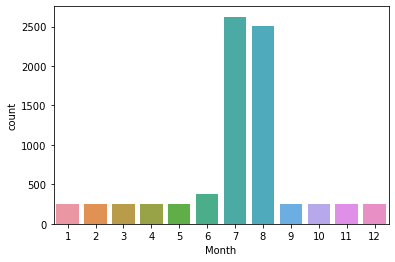

In [31]:
sns.countplot(df.Month)

We have the data mosthly from the month of July and August

Lets make the seperate vaiable to study some of the features impact on next day temperature.

In [32]:
columns=['Present_Tmax','RHmax','Tmax_lapse','WS','LH','CC1','PPT1','lat','lon','DEM']

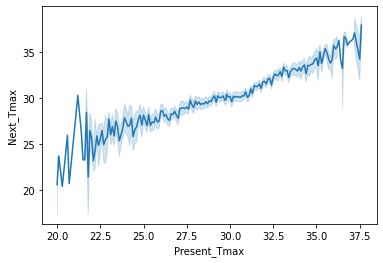

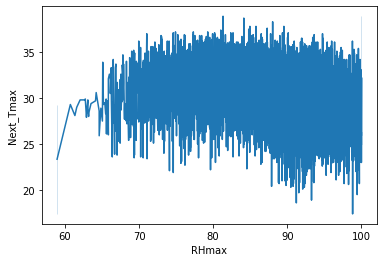

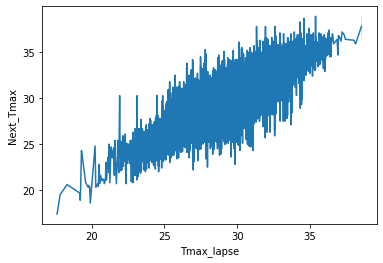

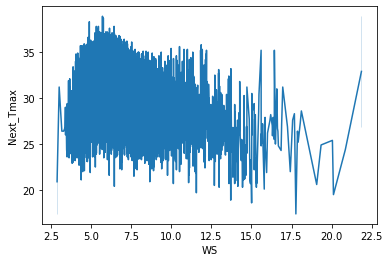

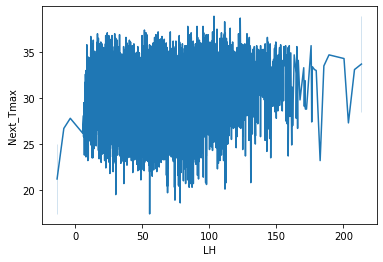

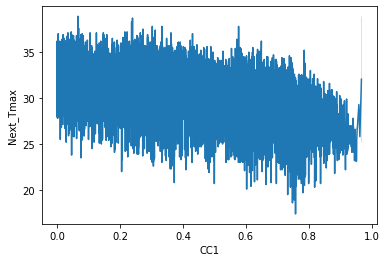

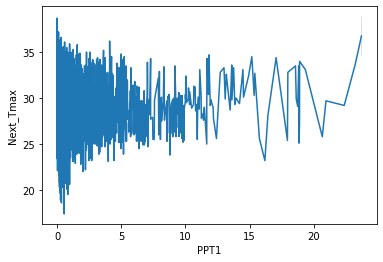

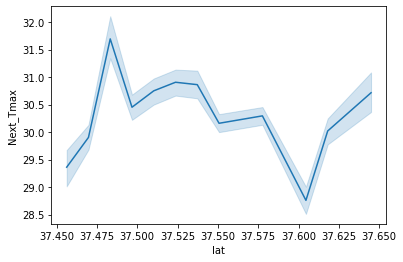

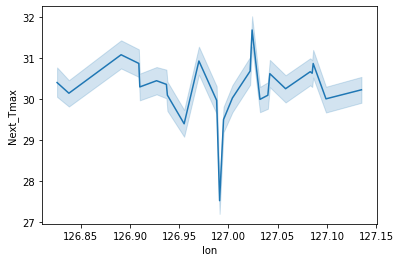

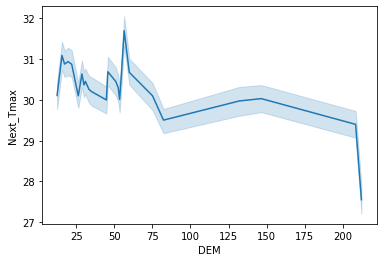

In [33]:
for i in columns:
    sns.lineplot(x=i,y='Next_Tmax',data=df)
    plt.show()

Observation:

1. Next_Tmax and Next_Tmin has positive relation with Present_Tmax and Present_Tmin.
2. Increase in Laspe increases the next day temperature
3. CC has the negative impact and increase in CC can reduce the nxt day temperature.
4. Lat and Lon has no relation with the increase or decrease in temperature.
5. temperature decreases with the increase in DEM.

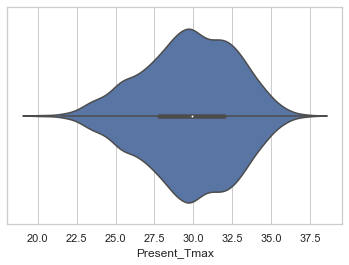

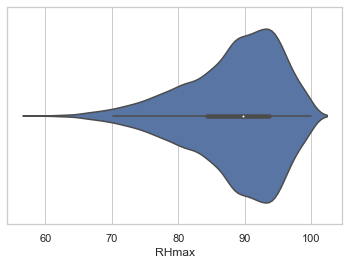

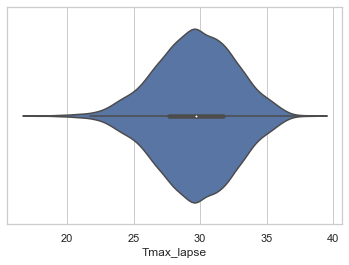

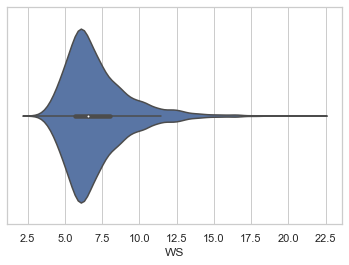

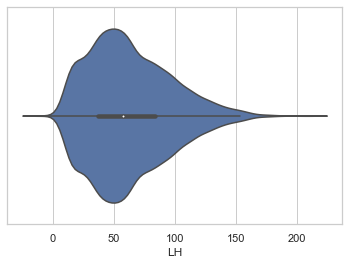

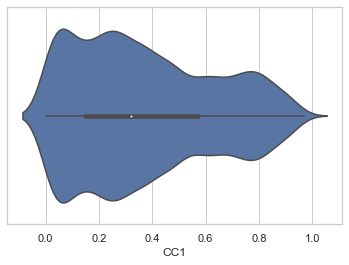

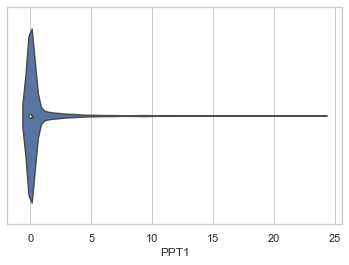

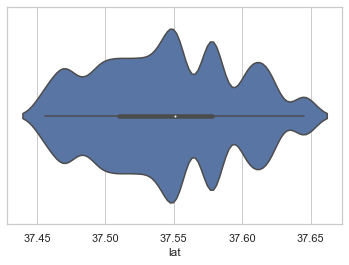

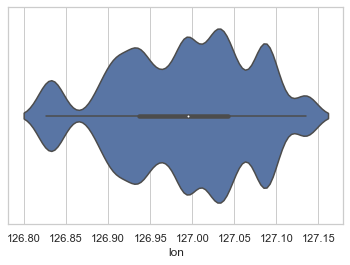

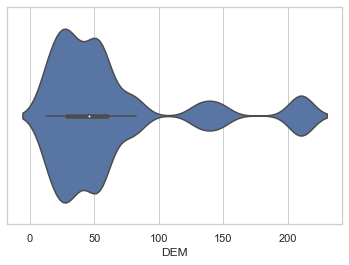

In [35]:
for i in columns:
    sns.set(style='whitegrid')
    sns.violinplot(df[i])
    plt.show()

With the violin plot we can conclude that there are outliers present in the dataset. PPT1-PPT4 has outliers.

<AxesSubplot:ylabel='station'>

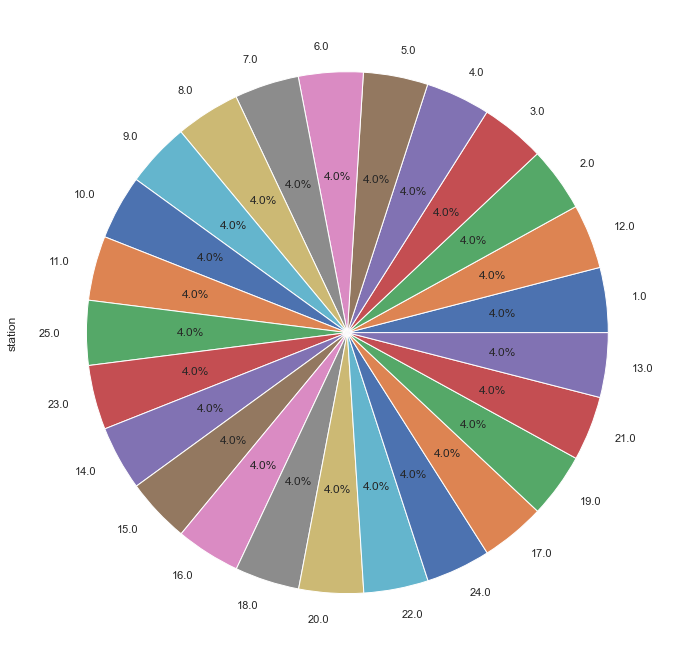

In [36]:
df['station'].value_counts().plot.pie(figsize = (12,12), autopct = '%.1f%%')

All the 25 stations are equally distributed.

array([[<AxesSubplot:title={'center':'station'}>,
        <AxesSubplot:title={'center':'Present_Tmax'}>,
        <AxesSubplot:title={'center':'Present_Tmin'}>,
        <AxesSubplot:title={'center':'RHmin'}>,
        <AxesSubplot:title={'center':'RHmax'}>],
       [<AxesSubplot:title={'center':'Tmax_lapse'}>,
        <AxesSubplot:title={'center':'Tmin_lapse'}>,
        <AxesSubplot:title={'center':'WS'}>,
        <AxesSubplot:title={'center':'LH'}>,
        <AxesSubplot:title={'center':'CC1'}>],
       [<AxesSubplot:title={'center':'CC2'}>,
        <AxesSubplot:title={'center':'CC3'}>,
        <AxesSubplot:title={'center':'CC4'}>,
        <AxesSubplot:title={'center':'PPT1'}>,
        <AxesSubplot:title={'center':'PPT2'}>],
       [<AxesSubplot:title={'center':'PPT3'}>,
        <AxesSubplot:title={'center':'PPT4'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>,
        <AxesSubplot:title={'center':'DEM'}>],
       [<AxesSubplot:title={'cente

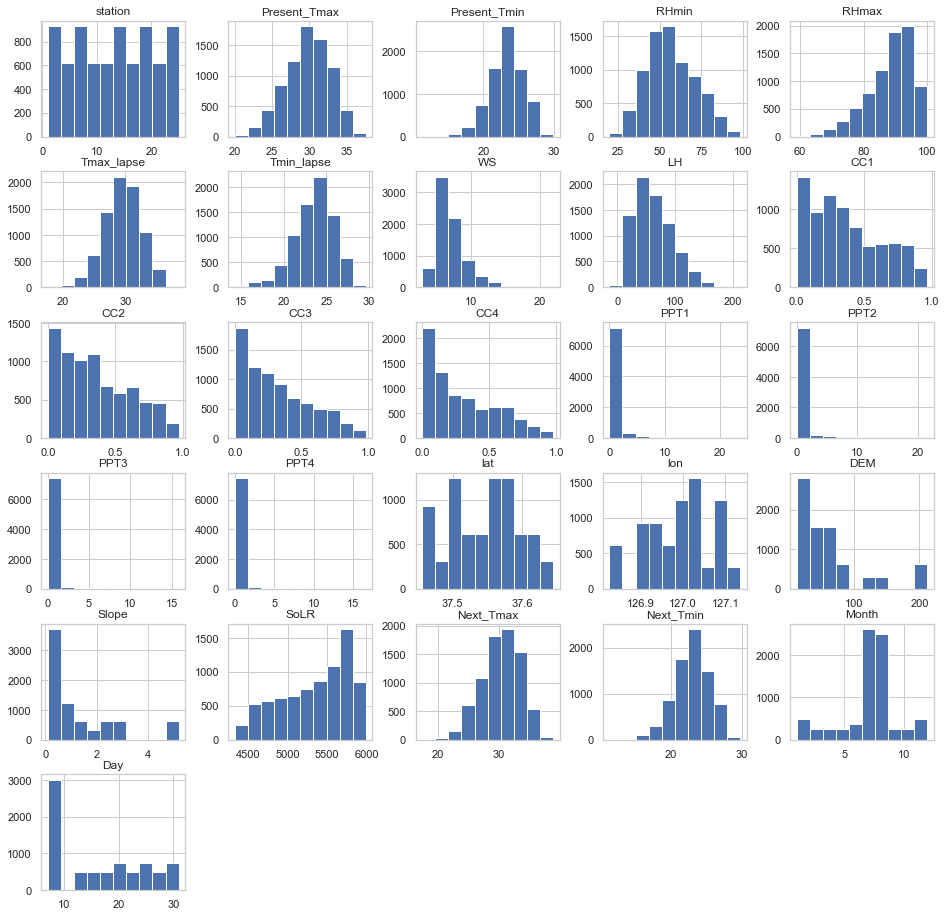

In [37]:
df.hist(figsize=(16,16))

1. Mostly temperature is between 28 to 33 degree.
2. PPT1 to PPT4 has mostly one value.
3. Major Data is from Jul and Aug month.

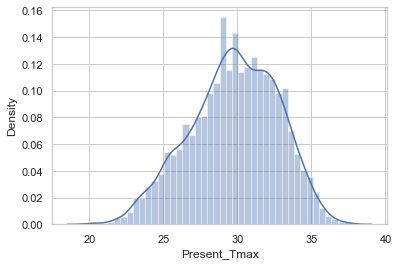

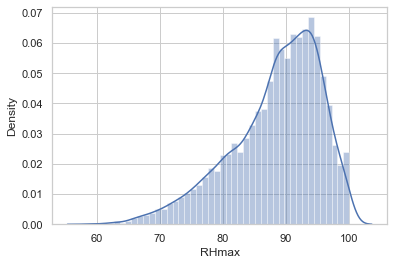

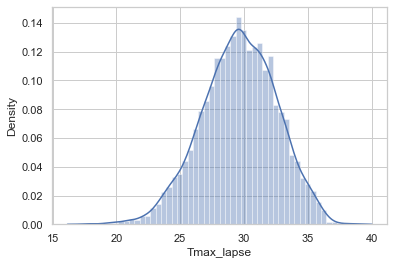

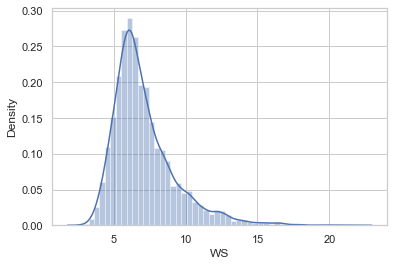

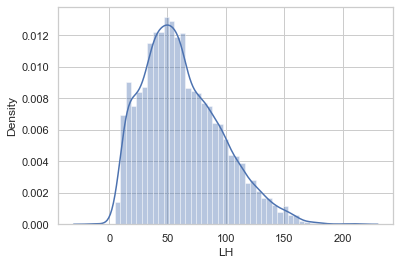

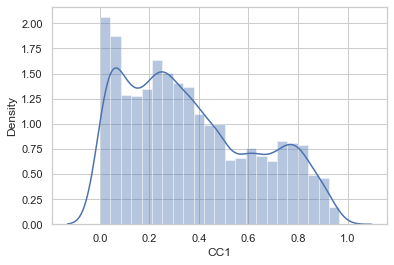

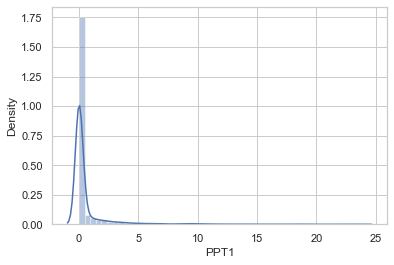

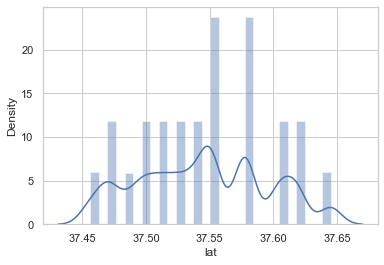

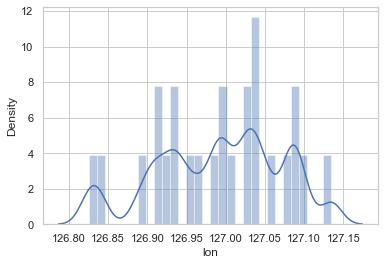

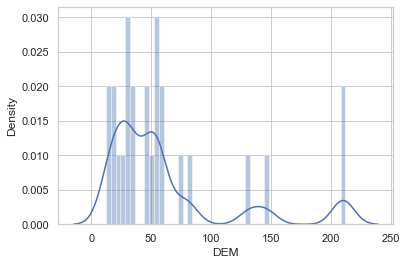

In [38]:
for i in columns:
    sns.distplot(df[i])
    plt.show()

1. Present_Tmax and Tmax_lapse are close to normal distribuion
2. RHmax is right skewed.
3. WS left skewed.
4. LH is slightly left skewed.
5. PPT1-PPT4 all are left skewed

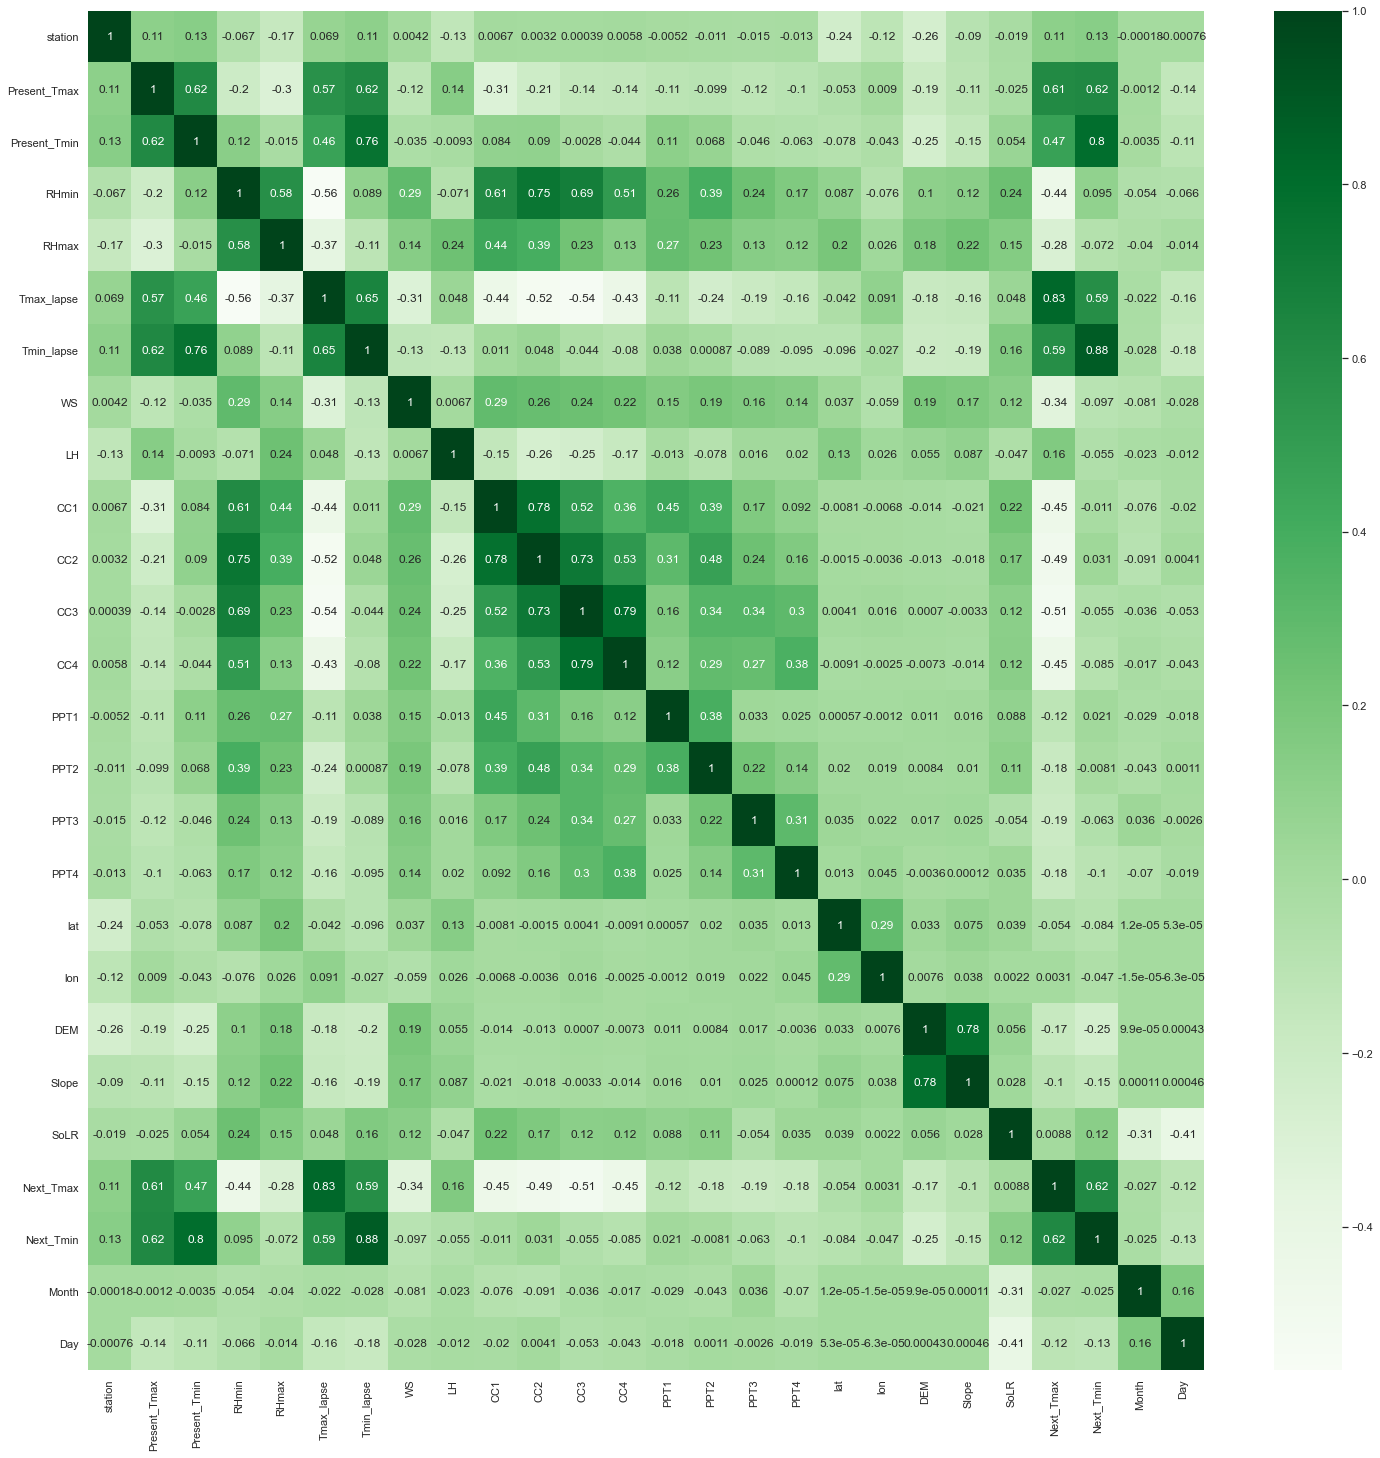

In [40]:
corr=df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.show()

Next_Tmax has the strong corelation with CC1-CC4 and weakeest with longtitude.

Next_Tmax and Next_Tmin is strongly corelated with Tmax_lapse and Tmin_lapse respectively.

CC1 and CC2 are strongly corelated to each other. CC3 and CC4 are also strongly corelated.

DEM and Slope has a strong corelation among themselves.

From above we can conclude that many features are corelated to each other and we may try using PCA to check the model fitting.

# Outliers and Skewness Check

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station       7752 non-null   float64
 1   Present_Tmax  7752 non-null   float64
 2   Present_Tmin  7752 non-null   float64
 3   RHmin         7752 non-null   float64
 4   RHmax         7752 non-null   float64
 5   Tmax_lapse    7752 non-null   float64
 6   Tmin_lapse    7752 non-null   float64
 7   WS            7752 non-null   float64
 8   LH            7752 non-null   float64
 9   CC1           7752 non-null   float64
 10  CC2           7752 non-null   float64
 11  CC3           7752 non-null   float64
 12  CC4           7752 non-null   float64
 13  PPT1          7752 non-null   float64
 14  PPT2          7752 non-null   float64
 15  PPT3          7752 non-null   float64
 16  PPT4          7752 non-null   float64
 17  lat           7752 non-null   float64
 18  lon           7752 non-null 

From violin plot we have concluded that our dataset has outliers. Hence we will treat them using zscore.

In [42]:
from scipy.stats import zscore

In [43]:
z=np.abs(zscore(df.drop(columns=['Next_Tmax','Next_Tmin'])))
z

array([[1.66329184, 0.36132577, 0.75952931, ..., 1.51793488, 0.48297247,
        1.6529319 ],
       [1.52464842, 0.72108401, 0.6762959 , ..., 1.22994952, 0.48297247,
        1.6529319 ],
       [1.38600499, 0.61960809, 0.03118815, ..., 1.21653443, 0.48297247,
        1.6529319 ],
       ...,
       [1.66415031, 2.22171758, 2.42419767, ..., 2.0743251 , 0.41069088,
        1.6529319 ],
       [1.66329184, 3.30412736, 4.9628169 , ..., 2.35821196, 0.41069088,
        1.77424571],
       [1.66329184, 2.64912642, 2.77789093, ..., 1.51793488, 0.41069088,
        1.77424571]])

In [44]:
print('shape before removing the outliers:', df.shape)
 
dfnew=df[(z<3).all(axis=1)]
 
print('shape after removing the outliers:', dfnew.shape)

shape before removing the outliers: (7752, 26)
shape after removing the outliers: (6907, 26)


In [45]:
100-((6907/7752)*100)

10.900412796697623

We are losing around 11% of the data which is very high hence we will not remove the outliers

In [46]:
df.skew()

station         0.000100
Present_Tmax   -0.264137
Present_Tmin   -0.367538
RHmin           0.300220
RHmax          -0.855015
Tmax_lapse     -0.227880
Tmin_lapse     -0.581763
WS              1.579236
LH              0.673757
CC1             0.459458
CC2             0.472350
CC3             0.640735
CC4             0.666482
PPT1            5.393821
PPT2            5.775355
PPT3            6.457129
PPT4            6.825464
lat             0.087062
lon            -0.285213
DEM             1.723257
Slope           1.563020
SoLR           -0.511210
Next_Tmax      -0.340200
Next_Tmin      -0.404447
Month          -0.705586
Day             0.245283
dtype: float64

We will use power transform method to correct the skewness but before that we will make a copy of our data and remove the Target variable.

In [47]:
from sklearn.preprocessing import power_transform

Making a copy as df_new

In [48]:
df_new=df.copy()

Dropping the traget variable as we cant treat the skewness in that

In [49]:
df.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)

Running the power-transform method

In [50]:
df2=power_transform(df)
df2=pd.DataFrame(data=df2,columns=df.columns)

In [51]:
df2.skew()

station        -0.204739
Present_Tmax   -0.035006
Present_Tmin   -0.012048
RHmin          -0.017469
RHmax          -0.115143
Tmax_lapse     -0.009351
Tmin_lapse     -0.017827
WS              0.002408
LH              0.057403
CC1             0.046757
CC2             0.045326
CC3             0.087933
CC4             0.126895
PPT1            1.404189
PPT2            1.577808
PPT3            1.747820
PPT4            1.963848
lat             0.000000
lon            -0.198429
DEM             0.039456
Slope           0.233968
SoLR           -0.176636
Month           0.043780
Day            -0.041940
dtype: float64

We are unable to correct skewness from PPT1-PPT4 as it has large outliers.

We will now add the target variable.

In [52]:
df2['Next_Tmax']=df_new['Next_Tmax']
df2['Next_Tmin']=df_new['Next_Tmin']

In [53]:
df2

,station,Present_Tmax,Present_Tmin,RHmin,RHmax,Tmax_lapse,Tmin_lapse,WS,LH,CC1,CC2,CC3,CC4,PPT1,PPT2,PPT3,PPT4,lat,lon,DEM,Slope,SoLR,Month,Day,Next_Tmax,Next_Tmin
0,-1.859306,-0.408897,-0.797707,0.172680,0.272915,-0.556645,-0.312411,0.093387,0.310382,-0.412176,-0.506509,-0.541852,-0.584801,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-0.027632,1.834978,1.314153,1.849430,-0.582534,1.418262,29.1,21.2
1,-1.647315,0.705123,-0.720130,-0.241770,0.185831,0.043756,0.144368,-0.625565,-0.211695,-0.451258,-0.283702,-0.554289,-0.603593,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.497283,0.055979,-0.385336,1.400702,-0.582534,1.418262,30.5,22.5
2,-1.453783,0.595692,-0.027674,-0.501459,-0.773454,0.127214,0.394571,-0.314874,-1.375126,-0.527382,-0.258127,-0.317480,-0.520112,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.836548,-0.364575,-0.949164,1.380650,-0.582534,1.418262,31.1,23.9
3,-1.272913,0.741829,0.014910,0.171612,1.316777,-0.006660,-0.174463,-0.656732,0.204179,-0.494077,-0.401828,-0.544825,-0.565449,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.368125,0.084879,1.235263,1.357783,-0.582534,1.418262,31.7,24.3
4,-1.101532,0.523313,-0.602237,0.031496,0.110968,-0.208627,-0.103881,-0.593836,1.300503,-0.814752,-0.291713,-0.448666,-0.365736,-0.570471,-0.532418,-0.505596,-0.458389,0.0,1.871193,-0.290442,-0.401730,1.366748,-0.582534,1.418262,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.312280,-2.023162,-2.270927,-2.395892,-1.326845,-1.111724,-1.831134,-0.307886,0.383363,-1.502656,-1.152361,-1.595889,-1.480634,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-1.257759,-1.578128,-1.280447,-1.754608,0.363879,1.418262,28.3,18.1
7748,1.427169,-2.023162,-2.087438,-2.681557,-1.470235,-0.902733,-1.843546,-0.063701,-0.363041,-1.466503,-1.187449,-1.595889,-1.480634,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-1.041466,-1.400633,-1.072947,-1.760631,0.363879,1.418262,28.6,18.8
7749,1.540836,-2.049920,-2.180066,-2.803707,-1.474702,-0.600985,-1.904782,0.337939,-1.973052,-1.386744,-1.276108,-1.595889,-1.474280,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-0.291792,-1.193124,-0.935044,-1.744763,0.363879,1.418262,27.8,17.4
7750,-1.859306,-2.846187,-3.688005,-3.168120,-2.459357,-3.504186,-2.891504,-4.119648,-7.414001,-1.694130,-1.649551,-1.595889,-1.480634,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-2.020630,-1.985144,-1.477264,-1.887071,0.363879,1.487857,17.4,11.3


Let's seperate the input and target variable from the Data.

We need to predict Next_Tmax and Next_Tmin hence we will have to seperate datframe for target variable.

In [54]:
x=df2.iloc[:,0:24]
y_max=df2['Next_Tmax']
y_min=df2['Next_Tmin']
y_max=pd.DataFrame(data=y_max)
y_min=pd.DataFrame(data=y_min)

Lets check the shape of each variable

In [55]:
x.shape,y_max.shape,y_min.shape

((7752, 24), (7752, 1), (7752, 1))

Before moving forward with PCA and model fitting we need to standardize our dataset.

We will use Standard Sacler for the same

In [56]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [57]:
sc_x=sc.fit_transform(x)

In [59]:
sc_x

array([[-1.85930569, -0.40889726, -0.79770658, ...,  1.8494304 ,
        -0.5825342 ,  1.41826208],
       [-1.64731477,  0.70512271, -0.72013038, ...,  1.40070208,
        -0.5825342 ,  1.41826208],
       [-1.45378306,  0.59569241, -0.02767423, ...,  1.38064953,
        -0.5825342 ,  1.41826208],
       ...,
       [ 1.54083622, -2.04992031, -2.18006638, ..., -1.74476253,
         0.36387853,  1.41826208],
       [-1.85930569, -2.84618687, -3.68800537, ..., -1.88707057,
         0.36387853,  1.48785666],
       [-1.85930569,  2.9810374 ,  3.23307848, ...,  1.8494304 ,
         0.36387853,  1.48785666]])

In [60]:
sc_x=pd.DataFrame(sc_x,columns=x.columns)

In [61]:
sc_x

,station,Present_Tmax,Present_Tmin,RHmin,RHmax,Tmax_lapse,Tmin_lapse,WS,LH,CC1,CC2,CC3,CC4,PPT1,PPT2,PPT3,PPT4,lat,lon,DEM,Slope,SoLR,Month,Day
0,-1.859306,-0.408897,-0.797707,0.172680,0.272915,-0.556645,-0.312411,0.093387,0.310382,-0.412176,-0.506509,-0.541852,-0.584801,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-0.027632,1.834978,1.314153,1.849430,-0.582534,1.418262
1,-1.647315,0.705123,-0.720130,-0.241770,0.185831,0.043756,0.144368,-0.625565,-0.211695,-0.451258,-0.283702,-0.554289,-0.603593,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.497283,0.055979,-0.385336,1.400702,-0.582534,1.418262
2,-1.453783,0.595692,-0.027674,-0.501459,-0.773454,0.127214,0.394571,-0.314874,-1.375126,-0.527382,-0.258127,-0.317480,-0.520112,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.836548,-0.364575,-0.949164,1.380650,-0.582534,1.418262
3,-1.272913,0.741829,0.014910,0.171612,1.316777,-0.006660,-0.174463,-0.656732,0.204179,-0.494077,-0.401828,-0.544825,-0.565449,-0.570471,-0.532418,-0.505596,-0.458389,0.0,0.368125,0.084879,1.235263,1.357783,-0.582534,1.418262
4,-1.101532,0.523313,-0.602237,0.031496,0.110968,-0.208627,-0.103881,-0.593836,1.300503,-0.814752,-0.291713,-0.448666,-0.365736,-0.570471,-0.532418,-0.505596,-0.458389,0.0,1.871193,-0.290442,-0.401730,1.366748,-0.582534,1.418262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,1.312280,-2.023162,-2.270927,-2.395892,-1.326845,-1.111724,-1.831134,-0.307886,0.383363,-1.502656,-1.152361,-1.595889,-1.480634,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-1.257759,-1.578128,-1.280447,-1.754608,0.363879,1.418262
7748,1.427169,-2.023162,-2.087438,-2.681557,-1.470235,-0.902733,-1.843546,-0.063701,-0.363041,-1.466503,-1.187449,-1.595889,-1.480634,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-1.041466,-1.400633,-1.072947,-1.760631,0.363879,1.418262
7749,1.540836,-2.049920,-2.180066,-2.803707,-1.474702,-0.600985,-1.904782,0.337939,-1.973052,-1.386744,-1.276108,-1.595889,-1.474280,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-0.291792,-1.193124,-0.935044,-1.744763,0.363879,1.418262
7750,-1.859306,-2.846187,-3.688005,-3.168120,-2.459357,-3.504186,-2.891504,-4.119648,-7.414001,-1.694130,-1.649551,-1.595889,-1.480634,-0.570471,-0.532418,-0.505596,-0.458389,0.0,-2.020630,-1.985144,-1.477264,-1.887071,0.363879,1.487857


In [62]:
x=sc_x

From co-relation heatmap we have understood that most of the features are co related to each other hence we will use PCA to avoid multi colinearity.

In [63]:
from sklearn.decomposition import PCA

In [64]:
testPCA=PCA()
Y=testPCA.fit(x)

Checking the cumulative sum of the expalined variance ratio.

In [65]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 25.20605446,  38.07320357,  46.34314445,  52.98091022,
        59.41671713,  64.91862549,  69.71045974,  73.98519594,
        77.85631998,  81.46868991,  84.46691577,  86.88042214,
        89.17756765,  91.29838964,  93.09147296,  94.62410373,
        95.91412801,  96.95512843,  97.8863724 ,  98.67056462,
        99.25171868,  99.72744549, 100.        , 100.        ])

The above variance shows the number of components against the data we will get. We take 17 components with 95.91% variance ratio.

In [66]:
FinalPCA=PCA(n_components=17)
final_x=FinalPCA.fit_transform(x)
finalx=pd.DataFrame(final_x)

In [67]:
finalx

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.353300,2.503422,-2.024326,-0.185177,0.332959,-0.569108,0.294639,0.439290,-1.254202,-1.086078,-0.344079,-0.265121,0.744462,1.419997,0.730879,-0.191955,0.605989
1,-1.157812,0.654540,-0.521596,-0.473591,0.078806,-0.186316,1.433495,-0.087516,-1.052224,-1.143071,-0.236061,-0.040360,0.652611,1.389633,0.450608,0.050929,1.006769
2,-1.410760,-0.266889,0.240818,-0.387900,0.671097,-0.933237,1.402167,-0.799768,-0.788121,-1.618712,-0.194779,0.157730,0.655303,1.303741,0.525719,0.326541,1.074476
3,-0.743598,0.948988,-1.586615,-0.174097,-0.465474,-0.111663,0.908646,0.475199,-1.285383,-0.161175,-0.451153,0.012660,1.065008,1.256761,0.135521,0.509603,1.063047
4,-1.090262,0.852578,-0.570637,-0.234535,-0.199411,0.839750,2.018301,-0.646580,-0.930662,-0.277403,-1.546362,0.113724,0.351313,1.401368,0.624069,-0.009723,0.650320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,-2.929999,3.172160,4.213509,-1.437943,-1.004297,0.576889,-1.209970,-0.674228,-0.142128,0.238545,0.557205,0.279853,-0.434898,0.058437,-0.119547,-0.371978,-0.378801
7748,-3.050171,3.085601,4.137714,-1.258649,-0.700124,-0.005131,-1.411623,-1.123990,0.033759,0.153390,0.727933,0.334220,-0.297080,-0.001355,-0.206962,-0.199660,-0.333595
7749,-3.032140,3.080868,4.119377,-1.058535,-0.101439,-1.103248,-1.389521,-2.022836,0.481086,-0.033173,0.929785,0.687467,0.141790,-0.103467,-0.459226,0.286736,-0.153169
7750,-2.812867,4.969116,7.324037,-1.560404,1.344042,-4.239419,1.685294,0.006449,0.009539,-1.904372,5.463459,0.418271,-0.091287,0.408296,-1.193422,2.130537,2.439337


This is our final dataset after the PCA. I will reassign x to finalx

In [68]:
x=finalx
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.353300,2.503422,-2.024326,-0.185177,0.332959,-0.569108,0.294639,0.439290,-1.254202,-1.086078,-0.344079,-0.265121,0.744462,1.419997,0.730879,-0.191955,0.605989
1,-1.157812,0.654540,-0.521596,-0.473591,0.078806,-0.186316,1.433495,-0.087516,-1.052224,-1.143071,-0.236061,-0.040360,0.652611,1.389633,0.450608,0.050929,1.006769
2,-1.410760,-0.266889,0.240818,-0.387900,0.671097,-0.933237,1.402167,-0.799768,-0.788121,-1.618712,-0.194779,0.157730,0.655303,1.303741,0.525719,0.326541,1.074476
3,-0.743598,0.948988,-1.586615,-0.174097,-0.465474,-0.111663,0.908646,0.475199,-1.285383,-0.161175,-0.451153,0.012660,1.065008,1.256761,0.135521,0.509603,1.063047
4,-1.090262,0.852578,-0.570637,-0.234535,-0.199411,0.839750,2.018301,-0.646580,-0.930662,-0.277403,-1.546362,0.113724,0.351313,1.401368,0.624069,-0.009723,0.650320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,-2.929999,3.172160,4.213509,-1.437943,-1.004297,0.576889,-1.209970,-0.674228,-0.142128,0.238545,0.557205,0.279853,-0.434898,0.058437,-0.119547,-0.371978,-0.378801
7748,-3.050171,3.085601,4.137714,-1.258649,-0.700124,-0.005131,-1.411623,-1.123990,0.033759,0.153390,0.727933,0.334220,-0.297080,-0.001355,-0.206962,-0.199660,-0.333595
7749,-3.032140,3.080868,4.119377,-1.058535,-0.101439,-1.103248,-1.389521,-2.022836,0.481086,-0.033173,0.929785,0.687467,0.141790,-0.103467,-0.459226,0.286736,-0.153169
7750,-2.812867,4.969116,7.324037,-1.560404,1.344042,-4.239419,1.685294,0.006449,0.009539,-1.904372,5.463459,0.418271,-0.091287,0.408296,-1.193422,2.130537,2.439337


# Model Fitting and Selection

Training the model for calculating Next_Tmax

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

We will use Linear regression model to check for the best random state to fit our training and test data.

In [70]:
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y_max, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 160 is 0.7671796918967623


We will now split the data with the random_state 160 as that has given us the best accuracy.

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y_max,test_size=.20,random_state=160)

Fitting the data to SupportVectorRegression model

In [72]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.7274014253396264
0.8490307421987056
0.8782394986207708


Kernel 'rbf' has given us the best output, hence we will select 'rbf' for testing the model

Fitting the data to various model and checking the accuracy.

In [73]:
sv=SVR(kernel='rbf')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,sv,dt,rf,kn,ab,gb,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y_max,cv=kf)
    cv.append(score.mean()*100)
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,73.172946,76.717969,2.414211,73.790539
1,SupportVector,87.823950,87.595046,1.286321,86.028191
2,DecisionTree,100.000000,65.701094,3.556596,65.523264
3,RandomForest,97.963672,87.623452,1.283376,85.965314
4,KNN,91.658684,88.266616,1.216683,87.114513
5,AdaBoost,64.848057,65.706726,3.556012,63.370440
6,GradientBoosting,83.171113,81.945740,1.872121,79.483744
7,Lasso,56.059500,59.478074,4.201887,57.489642
8,Ridge,73.172945,76.718073,2.414200,73.790565


Support vector and KNN has performed well with least difference on CV score

Support vector having Test score of 87.59% and CV score of 86%

KNN is having Test score of 88% and CV score of 87%

# HyperTuning

In [75]:
from sklearn.model_selection import GridSearchCV

KNN 

In [76]:
parameters = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

In [78]:
grid_search=GridSearchCV(kn,parameters,verbose=4,refit=True,cv = 5,n_jobs = -1)

In [79]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [80]:
Finalmod_max=KNeighborsRegressor(algorithm='auto',leaf_size=1,n_jobs=-1,n_neighbors=7,weights='distance')
Finalmod_max.fit(x_train,y_train)
pred_test=Finalmod_max.predict(x_test)
R2=r2_score(y_test,pred_test)
scores=cross_val_score(Finalmod_max,x,y_max,cv=kf)
MSE = mean_squared_error(y_test,pred_test)
print('KNeighborsRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', R2*100)
print('Cross Validation score',scores.mean()*100)
print('Mean Square Error',MSE)

KNeighborsRegressor Performance
---------------------------------------------------
Accuracy Score 88.79218690077968
Cross Validation score 87.59371828200082
Mean Square Error 1.1621848104873433


There is an improvement in the accuracy of the model. Accuracy is 88.79% with CV score of 87.59%

Plotting the model

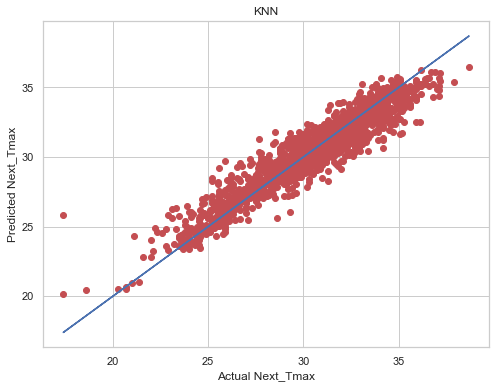

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Next_Tmax')
plt.ylabel('Predicted Next_Tmax')
plt.title('KNN')
plt.show()

SVR

In [82]:
parameters = {'kernel': ('rbf','poly'), 'C':[1.0,1.5, 10],'gamma': ['scale', 'auto'],'epsilon':[0.1,0.2,0.3]}

In [83]:
grid_search=GridSearchCV(sv,parameters,verbose=4,refit=True,cv = 5,n_jobs = -1)

In [84]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1.0, 1.5, 10], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ('rbf', 'poly')},
             verbose=4)

In [85]:
Finalmod_max2=SVR(kernel='rbf',C=10,epsilon=0.2,gamma='auto')
Finalmod_max2.fit(x_train,y_train)
pred_test2=Finalmod_max2.predict(x_test)
R2_2=r2_score(y_test,pred_test2)
scores_2=cross_val_score(Finalmod_max2,x,y_max,cv=kf)
MSE_2 = mean_squared_error(y_test,pred_test)
print('SupportVectorRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', R2_2*100)
print('Cross Validation score',scores_2.mean()*100)
print('Mean Square Error',MSE_2)

SupportVectorRegressor Performance
---------------------------------------------------
Accuracy Score 92.4073916802044
Cross Validation score 91.65965206176963
Mean Square Error 1.1621848104873433


SVR has performed very well with accuracy of 92.40% and CV score of 91.65%. We will finalize SVR as our final model for predicting Next_Tmax.

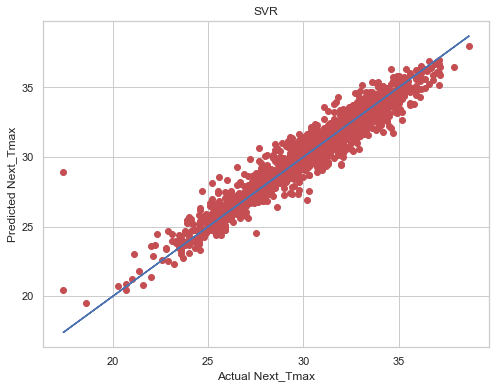

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test2, color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Next_Tmax')
plt.ylabel('Predicted Next_Tmax')
plt.title('SVR')
plt.show()

In [87]:
import joblib
joblib.dump(Finalmod_max2,'Next_Tmax_prediction.obj')

['Next_Tmax_prediction.obj']

Training the model for calculating Next_Tmin

In [88]:
MaX_r2_score=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y_min, test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scores = r2_score(y_test,y_pred)
    if r2_scores>MaX_r2_score:
        MaX_r2_score = r2_scores
        random_state = i
    
print("MaX R2 score corresponding to random state",random_state,"is",MaX_r2_score)

MaX R2 score corresponding to random state 160 is 0.8351217704394679


We will now split the data with the random_state 160 as that has given us the best accuracy.

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y_min,test_size=.20,random_state=160)

In [90]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.8136514527351113
0.8758710359141281
0.9049072856781718


Kernel 'rbf' has given us the best output, hence we will select 'rbf' for testing the model

Fitting the data to various model and checking the accuracy

In [91]:
sv=SVR(kernel='rbf')
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
kn=KNeighborsRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()
ls=Lasso()
rd=Ridge()

model=[lr,sv,dt,rf,kn,ab,gb,ls,rd]
kf = KFold(n_splits=5, random_state=54, shuffle=True)

train=[]
test=[]
Mse=[]
cv=[]

for m in model:
    m.fit(x_train,y_train)
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    train_score=r2_score(y_train,pred_train)
    train.append(train_score*100)
    test_score=r2_score(y_test,pred_test)
    test.append(test_score*100)
    mse = mean_squared_error(y_test,pred_test)
    Mse.append(mse)
    score=cross_val_score(m,x,y_max,cv=kf)
    cv.append(score.mean()*100)
    
Performance={'Model':['Linear Regression','SupportVector','DecisionTree','RandomForest','KNN','AdaBoost','GradientBoosting','Lasso','Ridge'],
             'Training Score':train,
            'Test Score':test,
            'Mean Square Error':Mse,
            'Cross Validation Score': cv}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Training Score,Test Score,Mean Square Error,Cross Validation Score
0,Linear Regression,81.539187,83.512177,1.065304,73.790539
1,SupportVector,90.490729,88.686693,0.730970,86.028191
2,DecisionTree,100.000000,72.342232,1.787011,66.141878
3,RandomForest,98.002368,86.733984,0.857138,85.939402
4,KNN,90.406650,87.501024,0.807578,87.114513
5,AdaBoost,74.035188,72.828603,1.755586,63.852142
6,GradientBoosting,87.011831,84.521112,1.000115,79.465748
7,Lasso,58.732489,58.589014,2.675628,57.489642
8,Ridge,81.539186,83.511970,1.065317,73.790565


For Next_TMin too SVR and KNN has performed well with Test accuracy of 88.68% and 87.50% and CV score of 86% an 87% respectively.

Hypertuning the Best Models 

KNN

In [92]:
parameters = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

In [93]:
grid_search=GridSearchCV(kn,parameters,verbose=4,refit=True,cv = 5,n_jobs = -1)

In [94]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             verbose=4)

In [95]:
Finalmod_min=KNeighborsRegressor(algorithm='auto',leaf_size=1,n_jobs=-1,n_neighbors=7,weights='distance')
Finalmod_min.fit(x_train,y_train)
pred_test=Finalmod_min.predict(x_test)
R2=r2_score(y_test,pred_test)
scores=cross_val_score(Finalmod_min,x,y_min,cv=kf)
MSE = mean_squared_error(y_test,pred_test)
print('KNeighborsRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', R2*100)
print('Cross Validation score',scores.mean()*100)
print('Mean Square Error',MSE)

KNeighborsRegressor Performance
---------------------------------------------------
Accuracy Score 87.73883896197728
Cross Validation score 86.46273210558826
Mean Square Error 0.7922126452141407


There is a slight improvement in the test accuracy with 87.73%

Lets see if we can get better result with SVR

SVR

In [96]:
parameters = {'kernel': ('rbf','poly'), 'C':[1.0,1.5, 10],'gamma': ['scale', 'auto'],'epsilon':[0.1,0.2,0.3]}

In [99]:
grid_search=GridSearchCV(sv,parameters,verbose=4,refit=True,cv = 5,n_jobs = -1)

In [100]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1.0, 1.5, 10], 'epsilon': [0.1, 0.2, 0.3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ('rbf', 'poly')},
             verbose=4)

In [101]:
Finalmod_min2=SVR(kernel='rbf',C=10,epsilon=0.1,gamma='auto')
Finalmod_min2.fit(x_train,y_train)
pred_test2=Finalmod_min2.predict(x_test)
R2_2=r2_score(y_test,pred_test2)
scores_2=cross_val_score(Finalmod_min2,x,y_min,cv=kf)
MSE_2 = mean_squared_error(y_test,pred_test2)
print('SupportVectorRegressor Performance')
print('---------------------------------------------------')
print('Accuracy Score', R2_2*100)
print('Cross Validation score',scores_2.mean()*100)
print('Mean Square Error',MSE_2)

SupportVectorRegressor Performance
---------------------------------------------------
Accuracy Score 92.63095073634457
Cross Validation score 92.22399004042812
Mean Square Error 0.4761257104258063


In this too SVR hs performed well with both Test and CV accuracy of 92%. Hence we will select this as our final model.

In [102]:
import joblib
joblib.dump(Finalmod_min2,'Next_Tmin_prediction.obj')

['Next_Tmin_prediction.obj']